In [4]:
# Trying to read huge EIA Electricity file

# import json

# data_path = "data/ELEC.ndjson"

# parsed_data = []

# with open(data_path, 'r') as file:
#     for line in file:
#         # print(line)
#         # Remove leading/trailing whitespaces and parse each line as JSON
#         for l in line:
#             data_object = json.loads(line.strip())
#             parsed_data.append(data_object)
#         break

here are the sales examples. Columns:

Month: gives you the month of the year. From 03.2018 to 11.2022
All other columns: your products sales, containing Region - Brand - Product information.

Eg. column: Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2
Split column name with strsplit(" - ") and you get:
Дальневосточный ФО  -> geographical region
AGALATES -> molecule
Agalates tabs 0.5 mg #2 -> concrete product

So if the goal is to build a hierarchy, we can build it:
Leaves: products
Parents: molecules
Parents of parents: regions

:*

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [6]:
df = pd.read_excel('data/Quarterly_smoothing.xlsx', index_col=0)

In [7]:
df = df.iloc[:, :20]

print("Shape", df.shape)
df.head()

Shape (57, 20)


,Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel susp 170 ml #1,Дальневосточный ФО - ALMONT - Almont FC tabs 10 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 4 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #98,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 10 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 25 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 50 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin tabs 4+100 mg #20,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 100 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 40 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene solution for inj 15 mg/2ml 2 ml #5 ampules,Дальневосточный ФО - AMBROBENE - Ambrobene syrup 15 mg/5ml #100 bottle
Month,,,,,,,,,,,,,,,,,,,,
2018-03-01,200,0,0,9,0,0,0,948,35,87,79,0,0,0,0,0,1038,0,1150,1081
2018-04-01,1000,0,0,9,0,0,0,1036,35,87,79,0,0,0,0,0,3219,1903,1550,9207
2018-05-01,1731,0,0,301,0,0,0,1245,93,147,18,19,0,0,0,0,4522,2220,1700,10998
2018-06-01,2090,0,0,490,0,0,0,1786,183,103,72,19,4,100,0,0,5125,2250,1050,25764
2018-07-01,1547,0,60,490,0,0,0,4131,183,103,72,19,24,100,0,0,3633,377,650,20549


### Plot signal of all drugs over time - see patterns

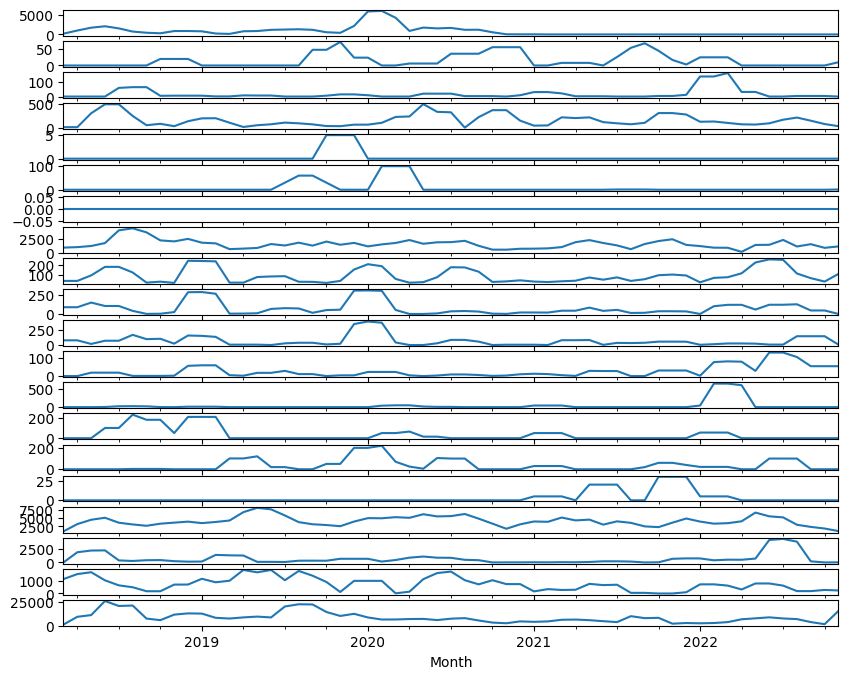

In [8]:
fig, axes = plt.subplots(len(df.columns), 1, figsize=(10, 8), sharex=True)
for i, column in enumerate(df.columns):
    df[column].plot(ax=axes[i])
    # axes[i].set_title(column)
    # axes[i].set_ylabel('Value')

Дальневосточный ФО - ALMAGEL - Almagel sachet 10 ml #10 is full of 0-s. let's remove all columns that are fully 0

In [11]:
def get_zero_columns(df):
    zero_columns_mask = (df == 0).all()
    zero_columns = df.columns[zero_columns_mask]

    return zero_columns

def remove_zero_columns(df):
    zero_columns = get_zero_columns(df)

    print(f"Removing {len(zero_columns)} columns with all zeros")

    df_without_zero_columns = df.drop(columns=zero_columns)

    return df_without_zero_columns

In [12]:
get_zero_columns(df)

Index(['Дальневосточный ФО - ALMAGEL - Almagel sachet 10 ml #10'], dtype='object')

In [13]:
df = remove_zero_columns(df)

Removing 1 columns with all zeros


In [14]:
correlation_results = df.corr()
correlation_results.head(5)

,Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel susp 170 ml #1,Дальневосточный ФО - ALMONT - Almont FC tabs 10 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 4 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #98,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 10 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 25 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 50 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin tabs 4+100 mg #20,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 100 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 40 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene solution for inj 15 mg/2ml 2 ml #5 ampules,Дальневосточный ФО - AMBROBENE - Ambrobene syrup 15 mg/5ml #100 bottle
Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,1.000000,-0.109353,-0.154337,0.102190,0.045741,0.523890,0.106018,0.279303,0.493383,0.617476,-0.188798,-0.122880,0.030896,0.586774,-0.256264,0.323436,-0.014880,0.310582,0.240708
Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,-0.109353,1.000000,0.005038,-0.017640,0.369342,-0.085731,-0.162789,-0.208054,-0.200239,-0.112437,-0.293043,-0.012984,-0.228964,-0.040836,0.024808,-0.316324,-0.283012,-0.154895,-0.078391
Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,-0.154337,0.005038,1.000000,-0.009920,-0.036536,-0.169566,0.075201,-0.084079,-0.037326,-0.096670,0.129383,0.689970,0.254283,-0.100433,0.012317,-0.072202,-0.096535,-0.095227,-0.143120
Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,0.102190,-0.017640,-0.009920,1.000000,-0.214516,-0.032268,0.285173,0.149354,-0.056045,-0.073096,-0.044800,-0.093372,0.129330,-0.144362,0.180760,0.080991,0.141813,-0.007888,0.105267
Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,0.045741,0.369342,-0.036536,-0.214516,1.000000,0.014373,0.053428,-0.070780,0.178489,0.164061,-0.170777,-0.069619,-0.129098,0.270583,-0.095238,-0.152848,-0.029590,-0.033524,0.156816


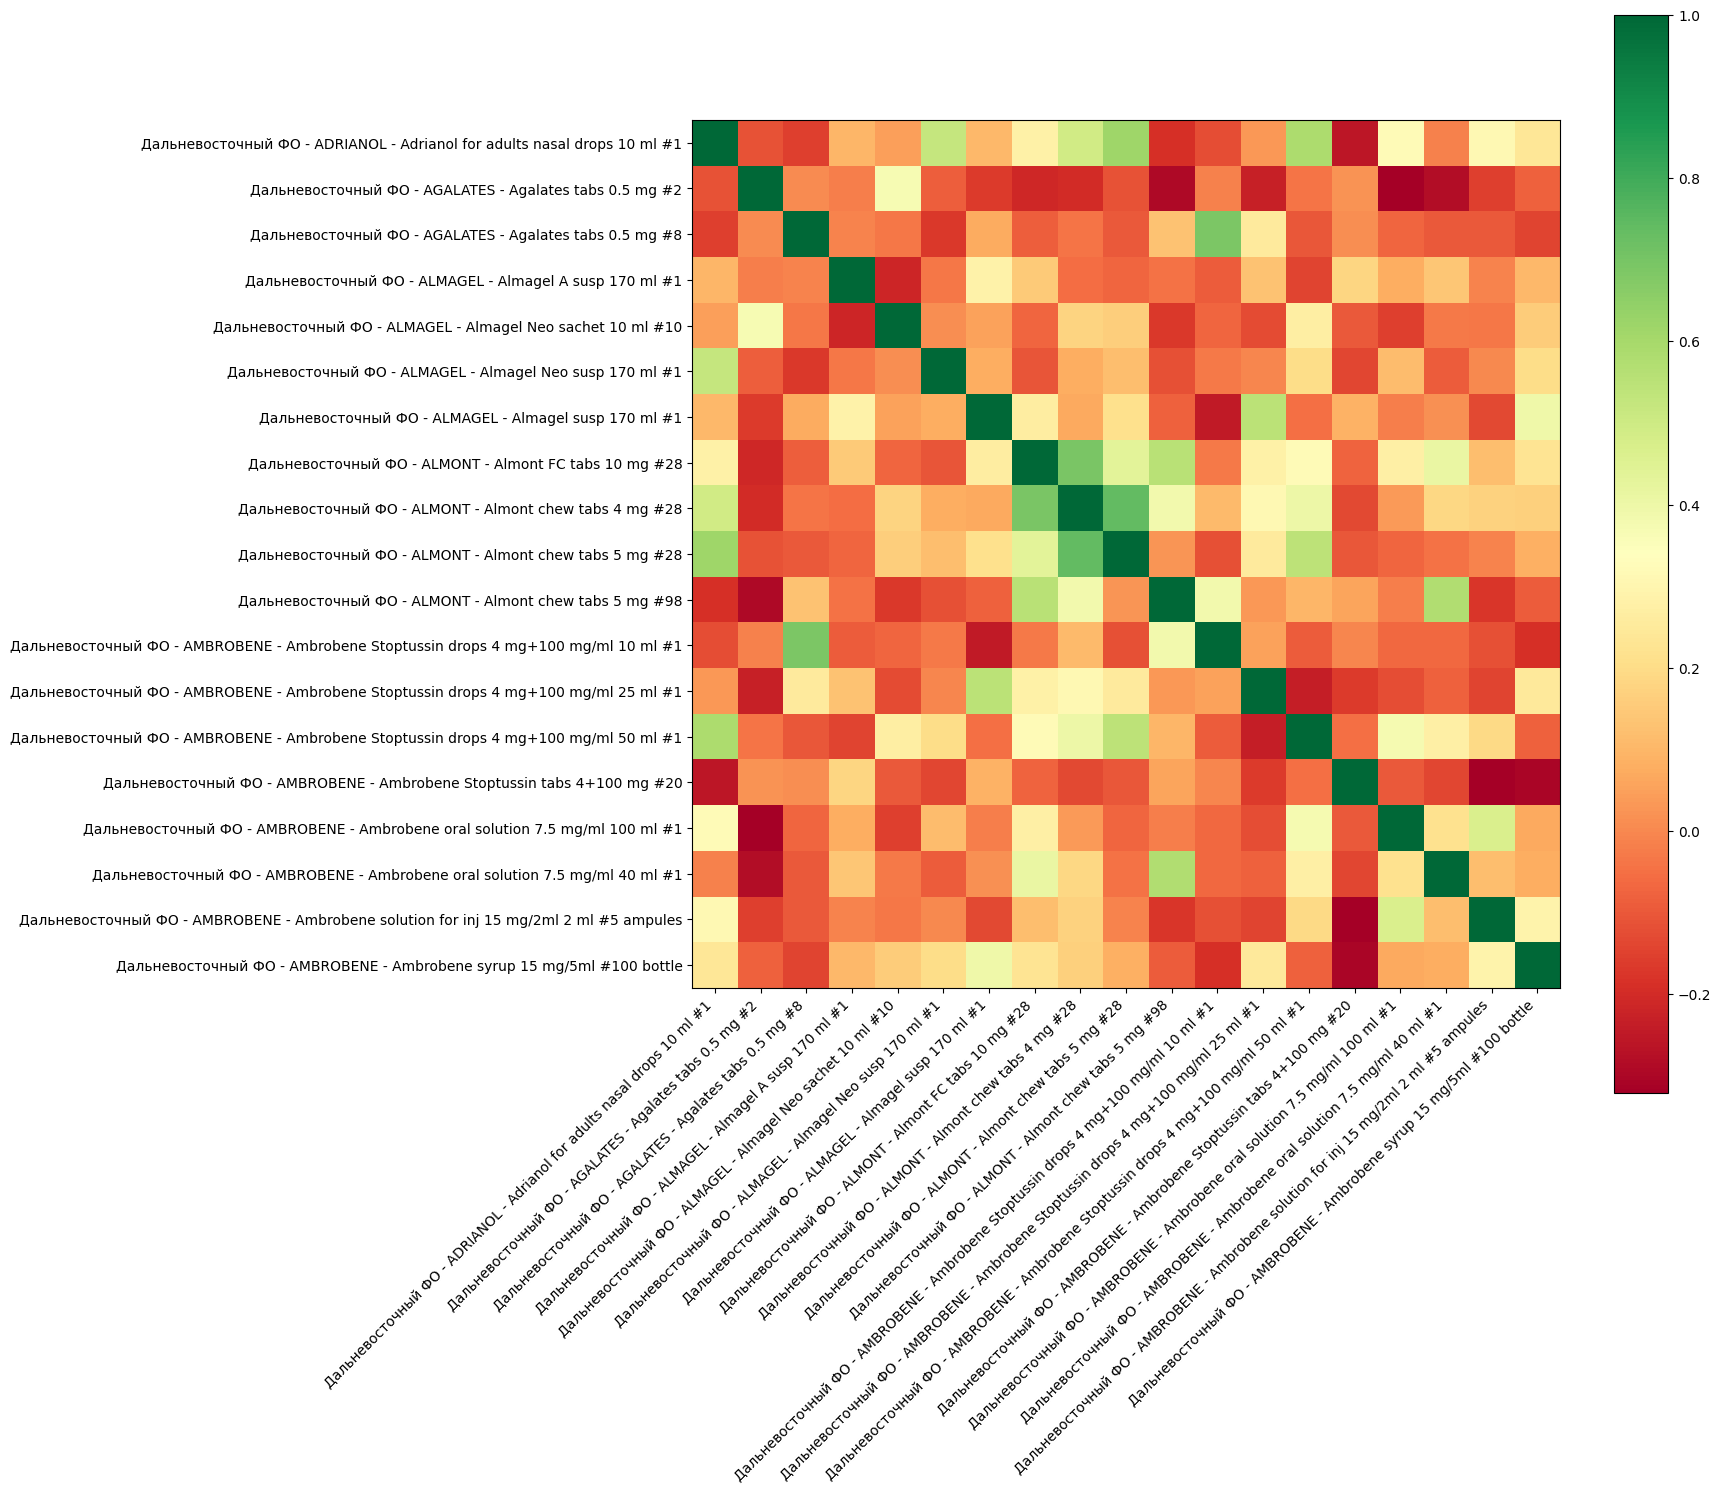

In [15]:
plt.figure(figsize=(14, 14))

plt.imshow(correlation_results, cmap='RdYlGn')#, interpolation='nearest')

num_columns = len(df.columns)
plt.xticks(range(num_columns), df.columns, rotation=45, ha='right')
plt.yticks(range(num_columns), df.columns)

# Add a colorbar for reference
plt.colorbar()

In [8]:
# Find the maximum correlation for each column, ignoring NaN in the diagonal
max_correlations = correlation_results.max().dropna()

# Print the results
for column, max_corr in max_correlations.items():
    other_column = correlation_results[column].idxmax()
    print(f"The maximum correlation for {column} is {max_corr:.2f} with {other_column}")


The maximum correlation for Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1 is 1.00 with Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1
The maximum correlation for Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2 is 1.00 with Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2
The maximum correlation for Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8 is 1.00 with Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8
The maximum correlation for Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1 is 1.00 with Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1
The maximum correlation for Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10 is 1.00 with Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10
The maximum correlation for Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1 is 1.00 with Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1
The maximum correlation for Дальнево

### With Lag Period

In [ ]:
# Set the maximum lag level you want to consider
max_lag = 6

# Create an empty DataFrame to store the correlation results
correlation_results_w_lag = pd.DataFrame(index=df.columns, columns=df.columns)

# Calculate correlations for each pair of time series at different lag levels
for col1 in df.columns:
    for col2 in df.columns:
        max_corr = -1
        max_lag_value = 0
        
        for lag in range(0, max_lag + 1):
            # Shift the second time series by the current lag
            shifted_series = df[col2].shift(lag)
            
            # Combine the two time series into a single DataFrame
            combined_df = pd.concat([df[col1], shifted_series], axis=1).dropna()

            # print(combined_df)
            # break
            
            # Calculate correlation between the two time series
            corr_matrix = np.corrcoef(combined_df.iloc[:, 0], combined_df.iloc[:, 1])
            corr = corr_matrix[0, 1]
            
            # Update max correlation and lag if a higher correlation is found
            if corr > max_corr:
                max_corr = corr
                max_lag_value = lag
        
        correlation_results_w_lag.loc[col1, col2] = f'{max_corr:.2f} (at lag {max_lag_value})'

# correlation_results_w_lag


## Scikit-hts

In [9]:
# Add Totals column
df['total'] = df.sum(axis=1)


# Split the columns into components
columns_split = [col.split(' - ') for col in df.columns]

# Get the unique top-level classes
top_level_classes = list(set([col[0] for col in columns_split]))

# Create a dictionary to represent the hierarchy
hierarchy = {'total': top_level_classes}

# Add the second-level categories
for region in top_level_classes:
    categories = list(set([col[1] for col in columns_split if col[0] == region]))
    hierarchy[region] = categories

# List to store the third-level keys and values
third_level = []
for region, categories in hierarchy.items():
    if region != 'total':
        for category in categories:
            key = f'{region} - {category}'
            products = [col for col in df.columns if col.startswith(f'{region} - {category} - ')]
            third_level.append((key, products))

# Add the third-level keys and values
for key, products in third_level:
    hierarchy[key] = products

# Print the hierarchy to verify
print(hierarchy)


IndexError: list index out of range

In [10]:
from hts import HTSRegressor

model = HTSRegressor(model='prophet', revision_method='BU')
model = model.fit(df, hierarchy)


KeyError: "None of [Index(['Дальневосточный ФО'], dtype='object')] are in the [columns]"